<a href="https://colab.research.google.com/github/VishalS-HK/3_The-Data-Farmers/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/download?datasetVersionNumber=2")


Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#EDA

len(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_data_gen = ImageDataGenerator(rescale= 1./255,zoom_range= 0.6, shear_range = 0.3, horizontal_flip = True, fill_mode='nearest')

validation_data_gen = ImageDataGenerator(rescale= 1./255)

In [ ]:
training = train_data_gen.flow_from_directory(directory = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size = (256, 256), batch_size = 32, class_mode = 'categorical')
validation = validation_data_gen.flow_from_directory(directory = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size = (256, 256,), batch_size = 32, class_mode = 'categorical')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')
])

In [ ]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

mc = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1, save_best_only = True)

cb = [es, mc]

In [46]:
# history = model.fit(training_set, epochs=10, steps_per_epoch = 5, validation_data=validation_set)
history = model.fit(training, epochs = 25, steps_per_epoch = 10, validation_data = validation, validation_steps = 16, callbacks = cb, )

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 2.2957 - accuracy: 0.3250
Epoch 1: val_accuracy improved from 0.52539 to 0.56836, saving model to best_model.h5
10/10 [==============================] - 7s 740ms/step - loss: 2.2957 - accuracy: 0.3250 - val_loss: 1.6407 - val_accuracy: 0.5684
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 2.2214 - accuracy: 0.3313
Epoch 2: val_accuracy did not improve from 0.56836
10/10 [==============================] - 7s 643ms/step - loss: 2.2214 - accuracy: 0.3313 - val_loss: 1.5590 - val_accuracy: 0.5566
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 2.1661 - accuracy: 0.3469
Epoch 3: val_accuracy did not improve from 0.56836
10/10 [==============================] - 8s 884ms/step - loss: 2.1661 - accuracy: 0.3469 - val_loss: 1.6448 - val_accuracy: 0.5234
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 2.1075 - accuracy: 0.3938
Epoch 4: val_accuracy did not improve from 

In [47]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

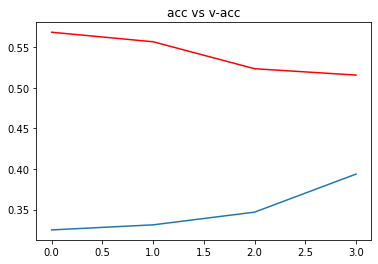

In [48]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

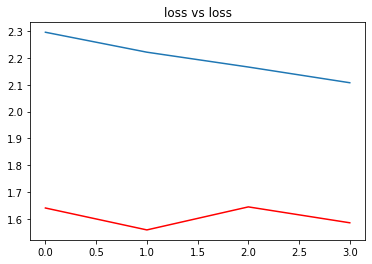

In [49]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = "red")
plt.title("loss vs loss")
plt.show()

In [50]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [53]:
accuracy = model.evaluate(validation)[1]

print(f"The accuracy of the model is = {accuracy * 100} %")

550/550 [==============================] - 54s 98ms/step - loss: 1.6092 - accuracy: 0.5520
The accuracy of the model is = 55.19576668739319 %
